<a href="https://colab.research.google.com/github/soyebganja/DL-Practice-Projects/blob/main/6%3ANeural%20Networks%3A%20Training/6_5_Mini_Batch_GD_and_SGD_PyTorch_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import pandas as pd
from matplotlib import pyplot as plt

# step-1: Read the dataset from csv file
df = pd.read_csv('bonus_dataset.csv')
df.head()

,employee_id,performance,years_of_experience,projects_completed,bonus
0,EMP_001,7,2,4,124
1,EMP_002,4,1,4,82
2,EMP_003,8,7,10,178
3,EMP_004,5,7,8,138
4,EMP_005,7,8,9,170


In [3]:
df.shape

(100, 5)

In [4]:
performance = torch.tensor(df['performance'].values, dtype=torch.float32)
years_of_experience = torch.tensor(df['years_of_experience'].values, dtype=torch.float32)
projects_completed = torch.tensor(df['projects_completed'].values, dtype=torch.float32)
bonus = torch.tensor(df['bonus'].values, dtype=torch.float32)

### Batch Gredient Decent

In [17]:
w1 = torch.rand(1, requires_grad=True)
w2 = torch.rand(1, requires_grad=True)
w3 = torch.rand(1, requires_grad=True)
bias = torch.rand(1, requires_grad=True)

epochs = 5000
learning_rate = 0.006
# List to store loss values at each epoch
loss_history = []

for epoch in range(epochs):
    y_pred = w1 * performance + w2 * years_of_experience + w3 * projects_completed + bias

    loss = torch.mean((y_pred - bonus) ** 2)
    loss_history.append(loss.item())

    loss.backward()

    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w3 -= learning_rate * w3.grad
        bias -= learning_rate * bias.grad

    w1.grad.zero_()
    w2.grad.zero_()
    w3.grad.zero_()
    bias.grad.zero_()

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, Loss: {loss.item():0.2f}')

# Print the learned weights and bias
print(f"Learned weights: w1 = {w1.item():.4f}, w2 = {w2.item():.4f}, w3 = {w3.item():.4f}")
print(f"Learned bias: {bias.item():.4f}")

Epoch: 0, Loss: 15780.24
Epoch: 100, Loss: 17.15
Epoch: 200, Loss: 14.97
Epoch: 300, Loss: 13.06
Epoch: 400, Loss: 11.40
Epoch: 500, Loss: 9.95
Epoch: 600, Loss: 8.68
Epoch: 700, Loss: 7.58
Epoch: 800, Loss: 6.61
Epoch: 900, Loss: 5.77
Epoch: 1000, Loss: 5.04
Epoch: 1100, Loss: 4.40
Epoch: 1200, Loss: 3.84
Epoch: 1300, Loss: 3.35
Epoch: 1400, Loss: 2.92
Epoch: 1500, Loss: 2.55
Epoch: 1600, Loss: 2.23
Epoch: 1700, Loss: 1.94
Epoch: 1800, Loss: 1.70
Epoch: 1900, Loss: 1.48
Epoch: 2000, Loss: 1.29
Epoch: 2100, Loss: 1.13
Epoch: 2200, Loss: 0.98
Epoch: 2300, Loss: 0.86
Epoch: 2400, Loss: 0.75
Epoch: 2500, Loss: 0.65
Epoch: 2600, Loss: 0.57
Epoch: 2700, Loss: 0.50
Epoch: 2800, Loss: 0.43
Epoch: 2900, Loss: 0.38
Epoch: 3000, Loss: 0.33
Epoch: 3100, Loss: 0.29
Epoch: 3200, Loss: 0.25
Epoch: 3300, Loss: 0.22
Epoch: 3400, Loss: 0.19
Epoch: 3500, Loss: 0.17
Epoch: 3600, Loss: 0.15
Epoch: 3700, Loss: 0.13
Epoch: 3800, Loss: 0.11
Epoch: 3900, Loss: 0.10
Epoch: 4000, Loss: 0.08
Epoch: 4100, Loss: 0

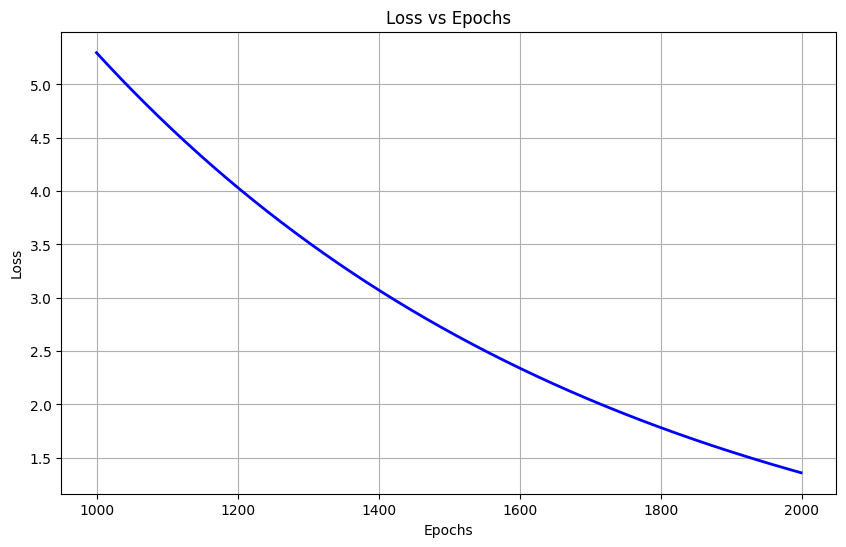

In [7]:
def plot_loss(epochs, loss_history, title):
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss_history, color='blue', linewidth=2)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

plot_loss(range(1000, 2000), loss_history[1000:2000], 'Loss vs Epochs')

### Mini Batch GD

In [16]:
w1 = torch.rand(1, requires_grad=True)
w2 = torch.rand(1, requires_grad=True)
w3 = torch.rand(1, requires_grad=True)
bias = torch.rand(1, requires_grad=True)

epochs = 5000
learning_rate = 0.001
# List to store loss values at each epoch
loss_history = []
batch_size = 16 # Defines the batch size

n_samples = len(performance)

for epoch in range(epochs):
  for i in range(0, n_samples, batch_size):
    start_idx = i
    end_idx = i + batch_size

    batch_performance = performance[start_idx:end_idx]
    batch_years_of_experience = years_of_experience[start_idx:end_idx]
    batch_projects_completed = projects_completed[start_idx:end_idx]
    batch_bonus = bonus[start_idx:end_idx]

    y_pred = w1 * batch_performance + w2 * batch_years_of_experience + w3 * batch_projects_completed + bias

    loss = torch.mean((y_pred - batch_bonus) ** 2)
    loss_history.append(loss.item())

    loss.backward()

    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w3 -= learning_rate * w3.grad
        bias -= learning_rate * bias.grad

    w1.grad.zero_()
    w2.grad.zero_()
    w3.grad.zero_()
    bias.grad.zero_()

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, Loss: {loss.item():0.2f}')

# Print the learned weights and bias
print(f"Learned weights: w1 = {w1.item():.4f}, w2 = {w2.item():.4f}, w3 = {w3.item():.4f}")
print(f"Learned bias: {bias.item():.4f}")

Epoch: 0, Loss: 17213.42
Epoch: 0, Loss: 10729.08
Epoch: 0, Loss: 6364.23
Epoch: 0, Loss: 2813.31
Epoch: 0, Loss: 3193.32
Epoch: 0, Loss: 1651.12
Epoch: 0, Loss: 1936.19
Epoch: 100, Loss: 10.49
Epoch: 100, Loss: 7.53
Epoch: 100, Loss: 21.42
Epoch: 100, Loss: 16.34
Epoch: 100, Loss: 27.51
Epoch: 100, Loss: 18.84
Epoch: 100, Loss: 12.92
Epoch: 200, Loss: 9.08
Epoch: 200, Loss: 6.28
Epoch: 200, Loss: 18.36
Epoch: 200, Loss: 14.20
Epoch: 200, Loss: 23.66
Epoch: 200, Loss: 16.17
Epoch: 200, Loss: 10.57
Epoch: 300, Loss: 7.84
Epoch: 300, Loss: 5.31
Epoch: 300, Loss: 15.75
Epoch: 300, Loss: 12.26
Epoch: 300, Loss: 20.32
Epoch: 300, Loss: 13.87
Epoch: 300, Loss: 8.83
Epoch: 400, Loss: 6.75
Epoch: 400, Loss: 4.52
Epoch: 400, Loss: 13.50
Epoch: 400, Loss: 10.55
Epoch: 400, Loss: 17.43
Epoch: 400, Loss: 11.90
Epoch: 400, Loss: 7.47
Epoch: 500, Loss: 5.79
Epoch: 500, Loss: 3.86
Epoch: 500, Loss: 11.57
Epoch: 500, Loss: 9.06
Epoch: 500, Loss: 14.95
Epoch: 500, Loss: 10.20
Epoch: 500, Loss: 6.36
Epo

In [9]:
len(loss_history)

35000

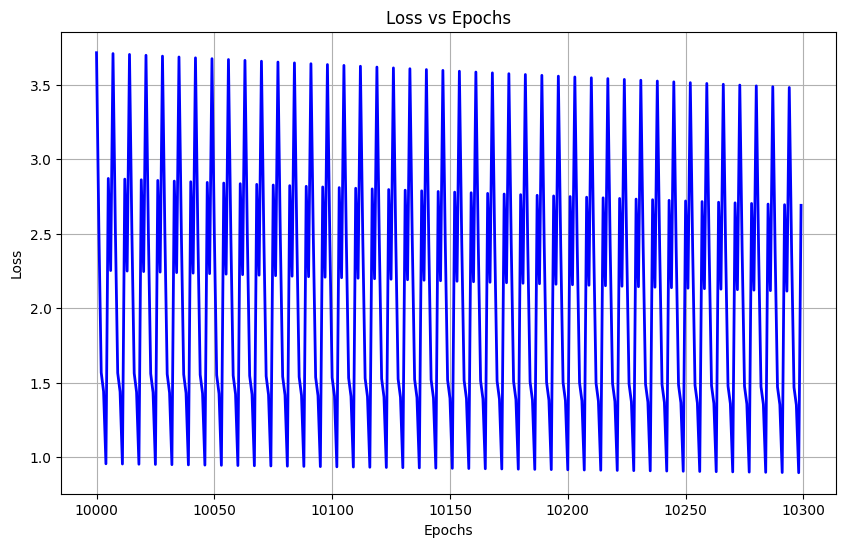

In [10]:
plot_loss(range(10000, 10300), loss_history[10000:10300], 'Loss vs Epochs')

### Stochastic Gradient Destcent

In [42]:
w1 = torch.randn(1, requires_grad=True)
w2 = torch.randn(1, requires_grad=True)
w3 = torch.randn(1, requires_grad=True)
bias = torch.randn(1, requires_grad=True)

learning_rate = 0.001
epochs = 500

n_samples = len(performance)

# List to store loss values at each epoch
loss_history = []

for epoch in range(epochs):
  for i in range(n_samples):
    single_performance = performance[i]
    single_years_of_experience = years_of_experience[i]
    single_projects_completed = projects_completed[i]
    single_bonus = bonus[i]

    y_pred = w1 * single_performance + w2 * single_years_of_experience + w3 * single_projects_completed + bias

    loss = torch.mean((y_pred - single_bonus) ** 2)

    if i%10 == 0:
      loss_history.append(loss.item())

    loss.backward()

    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w3 -= learning_rate * w3.grad
        bias -= learning_rate * bias.grad

    w1.grad.zero_()
    w2.grad.zero_()
    w3.grad.zero_()
    bias.grad.zero_()

  if (epoch+1) % 100 == 0:
    print(f'Epoch: [{epoch+1}/{epochs}], Loss: {loss.item():0.2f}')

# Print the learned weights and bias
print(f"Learned weights: w1 = {w1.item():.4f}, w2 = {w2.item():.4f}, w3 = {w3.item():.4f}")
print(f"Learned bias: {bias.item():.4f}")

Epoch: [100/500], Loss: 0.68
Epoch: [200/500], Loss: 0.06
Epoch: [300/500], Loss: 0.01
Epoch: [400/500], Loss: 0.00
Epoch: [500/500], Loss: 0.00
Learned weights: w1 = 12.0022, w2 = 5.9932, w3 = 2.0087
Learned bias: 19.9574


In [43]:
len(loss_history)

5000

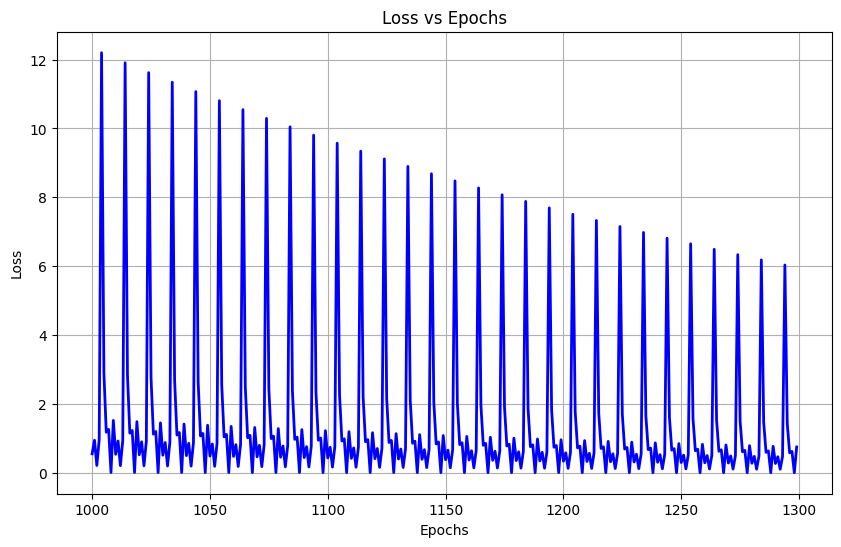

In [44]:
plot_loss(range(1000, 1300), loss_history[1000:1300], 'Loss vs Epochs')